In [ ]:
#Import semua library yang butuhkan
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy import stats
from datetime import datetime
import numpy as np

<strong>PREPROCESSING DATA TRAINING</strong>

In [ ]:
gd = pd.read_csv(r'C:\Users\LENOVO\data\building_metadata.csv')
gd

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [ ]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [ ]:
# Menghitung NAN
gd.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [ ]:
#year_built dan floor_count nilai kosong nya melebihi 50% dari data tersebut
gd = gd.dropna(axis=1)
gd

,site_id,building_id,primary_use,square_feet
0,0,0,Education,7432
1,0,1,Education,2720
2,0,2,Education,5376
3,0,3,Education,23685
4,0,4,Education,116607
...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619
1445,15,1445,Education,4298
1446,15,1446,Entertainment/public assembly,11265
1447,15,1447,Lodging/residential,29775


In [ ]:
# Mengecek apakah terdapat duplikat data
print(gd.shape)
gd.duplicated().sum()

(1449, 4)


0

Tidak ditemukan data duplikat pada data diatas.

In [ ]:
gd.describe()

,site_id,building_id,square_feet
count,1449.000000,1449.000000,1449.000000
mean,6.952381,724.000000,92111.776398
std,5.003432,418.434583,110769.950997
min,0.000000,0.000000,283.000000
25%,3.000000,362.000000,23012.000000
50%,5.000000,724.000000,57673.000000
75%,13.000000,1086.000000,115676.000000
max,15.000000,1448.000000,875000.000000


In [ ]:
cu = pd.read_csv(r'C:\Users\LENOVO\data\weather_train.csv')
cu

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [ ]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [ ]:
cu.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [ ]:
a = stats.mode(cu['air_temperature'])
b = stats.mode(cu['wind_direction'])
cu['air_temperature'] = cu['air_temperature'].fillna(15.0)
cu['wind_direction'] = cu['wind_direction'].fillna(0)
display(a, cu['air_temperature'])
display(b, cu['wind_direction'])

ModeResult(mode=array([15.]), count=array([2722]))

0         25.0
1         24.4
2         22.8
3         21.1
4         20.0
          ... 
139768     3.0
139769     2.8
139770     2.8
139771     2.2
139772     1.7
Name: air_temperature, Length: 139773, dtype: float64

ModeResult(mode=array([0.]), count=array([13154]))

0           0.0
1          70.0
2           0.0
3           0.0
4         250.0
          ...  
139768    180.0
139769    180.0
139770    180.0
139771    170.0
139772    180.0
Name: wind_direction, Length: 139773, dtype: float64

In [ ]:
cu['dew_temperature'].fillna(cu['dew_temperature'].mean(), inplace=True)
cu['wind_speed'].fillna(cu['wind_speed'].mean(), inplace=True)
cu.isnull().sum()

site_id                   0
timestamp                 0
air_temperature           0
cloud_coverage        69173
dew_temperature           0
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction            0
wind_speed                0
dtype: int64

In [ ]:
# cloud_coverage, precip_depth_1_hr, sea_level_pressure di hapus karena nilai kosong nya melebihi 50
cu = cu.dropna(axis=1)

In [ ]:
cu.describe()

,site_id,air_temperature,dew_temperature,wind_direction,wind_speed
count,139773.000000,139773.000000,139773.000000,139773.000000,139773.000000
mean,7.478977,14.418335,7.350158,172.431070,3.560527
std,4.604744,10.624511,9.786277,115.220234,2.333332
min,0.000000,-28.900000,-35.000000,0.000000,0.000000
25%,3.000000,7.200000,0.600000,70.000000,2.100000
50%,7.000000,15.000000,8.300000,180.000000,3.100000
75%,11.000000,22.200000,14.400000,270.000000,5.000000
max,15.000000,47.200000,26.100000,360.000000,19.000000


In [ ]:
en = pd.read_csv(r'C:\Users\LENOVO\data\train.csv')
en

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [ ]:
en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [ ]:
en.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [ ]:
# Mengecek apakah terdapat duplikat data
en.duplicated().sum()

0

In [ ]:
en.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [ ]:
data_submission = pd.read_csv(r'C:\Users\LENOVO\data\sample_submission.csv')
data_submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [ ]:
data_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 2 columns):
 #   Column         Dtype
---  ------         -----
 0   row_id         int64
 1   meter_reading  int64
dtypes: int64(2)
memory usage: 636.3 MB


In [ ]:
data_submission.isnull().sum()

row_id           0
meter_reading    0
dtype: int64

In [ ]:
data_test = pd.read_csv(r'C:\Users\LENOVO\data\test.csv')
data_test

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int64 
 2   meter        int64 
 3   timestamp    object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB


In [ ]:
data_test.isnull().sum()

row_id         0
building_id    0
meter          0
timestamp      0
dtype: int64

In [ ]:
data_test.duplicated().sum()

0

In [ ]:
data_test.describe()

,row_id,building_id,meter
count,4.169760e+07,4.169760e+07,4.169760e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01
std,1.203706e+07,4.297680e+02,9.278067e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00
50%,2.084880e+07,9.000000e+02,0.000000e+00
75%,3.127320e+07,1.194250e+03,1.000000e+00
max,4.169760e+07,1.448000e+03,3.000000e+00


<strong> MENCEK ADANYA OUTLIER <strong>

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
##Outliers Building_metadata

<AxesSubplot:xlabel='site_id'>

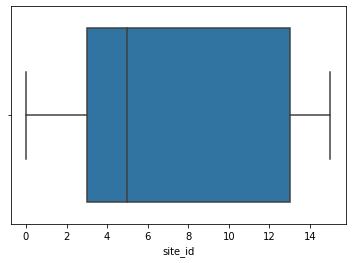

In [ ]:
sns.boxplot(x='site_id',data=gd)

In [ ]:
#batas atas = q3+(1.5*iqr)
#batas bawah = q1-(1.5*iqr)
#q1
#q3
#iqr = q3-q1

In [ ]:
q1,q3 = np.percentile(gd['site_id'],[25,75])
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)

3.0
13.0
10.0


In [ ]:
batasatas = q3+(1.5*iqr)
batasbawah = q1-(1.5*iqr)
print(batasbawah)
print(batasatas)

-12.0
28.0


In [ ]:
gd = gd[gd['site_id'] < batasatas]
gd

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


<AxesSubplot:xlabel='building_id'>

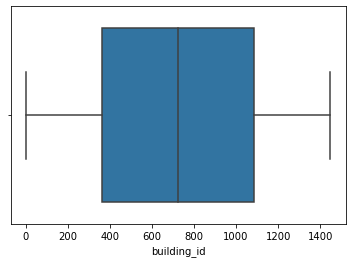

In [ ]:
sns.boxplot(x='building_id',data=gd)

In [ ]:
q1,q3 = np.percentile(gd['building_id'],[25,75])
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)

362.0
1086.0
724.0


In [ ]:
batasatas = q3+(1.5*iqr)
batasbawah = q1-(1.5*iqr)
print(batasbawah)
print(batasatas)

-724.0
2172.0


<AxesSubplot:xlabel='square_feet'>

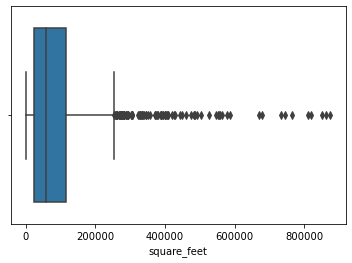

In [ ]:
sns.boxplot(x='square_feet',data=gd)

In [ ]:
q1,q3 = np.percentile(gd['square_feet'],[25,75])
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)

23012.0
115676.0
92664.0


In [ ]:
batasatas = q3+(1.5*iqr)
batasbawah = q1-(1.5*iqr)
print(batasbawah)
print(batasatas)

-115984.0
254672.0


In [ ]:
##Outliers data_submission

<AxesSubplot:xlabel='row_id'>

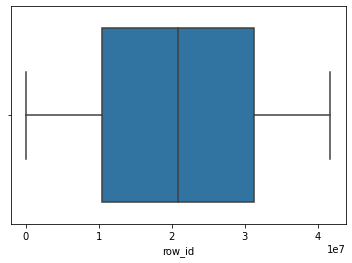

In [ ]:
sns.boxplot(x='row_id',data=data_submission)

In [ ]:
#batas atas = q3+(1.5*iqr)
#batas bawah = q1-(1.5*iqr)
#q1
#q3
#iqr = q3-q1

In [ ]:
q1,q3 = np.percentile(data_submission['row_id'],[25,75])
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)

10424399.75
31273199.25
20848799.5


In [ ]:
batasatas = q3+(1.5*iqr)
batasbawah = q1-(1.5*iqr)
print(batasbawah)
print(batasatas)

-20848799.5
62546398.5


In [ ]:
data_submission = data_submission[data_submission['row_id'] < batasatas]
data_submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


<strong> JOIN DATA <strong>

In [ ]:
gabungan = pd.merge(gd, cu)
gabungan

,site_id,building_id,primary_use,square_feet,timestamp,air_temperature,dew_temperature,wind_direction,wind_speed
0,0,0,Education,7432,2016-01-01 00:00:00,25.0,20.0,0.0,0.0
1,0,0,Education,7432,2016-01-01 01:00:00,24.4,21.1,70.0,1.5
2,0,0,Education,7432,2016-01-01 02:00:00,22.8,21.1,0.0,0.0
3,0,0,Education,7432,2016-01-01 03:00:00,21.1,20.6,0.0,0.0
4,0,0,Education,7432,2016-01-01 04:00:00,20.0,20.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
12676161,15,1448,Office,92271,2016-12-31 19:00:00,3.0,-8.0,180.0,5.7
12676162,15,1448,Office,92271,2016-12-31 20:00:00,2.8,-8.9,180.0,7.7
12676163,15,1448,Office,92271,2016-12-31 21:00:00,2.8,-7.2,180.0,5.1
12676164,15,1448,Office,92271,2016-12-31 22:00:00,2.2,-6.7,170.0,4.6


In [ ]:
gabungan2 = pd.merge(gabungan, en)
gabungan2

,site_id,building_id,primary_use,square_feet,timestamp,air_temperature,dew_temperature,wind_direction,wind_speed,meter,meter_reading
0,0,0,Education,7432,2016-01-01 00:00:00,25.0,20.0,0.0,0.0,0,0.000
1,0,0,Education,7432,2016-01-01 01:00:00,24.4,21.1,70.0,1.5,0,0.000
2,0,0,Education,7432,2016-01-01 02:00:00,22.8,21.1,0.0,0.0,0,0.000
3,0,0,Education,7432,2016-01-01 03:00:00,21.1,20.6,0.0,0.0,0,0.000
4,0,0,Education,7432,2016-01-01 04:00:00,20.0,20.0,250.0,2.6,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
20125600,15,1448,Office,92271,2016-12-31 19:00:00,3.0,-8.0,180.0,5.7,0,3.400
20125601,15,1448,Office,92271,2016-12-31 20:00:00,2.8,-8.9,180.0,7.7,0,2.700
20125602,15,1448,Office,92271,2016-12-31 21:00:00,2.8,-7.2,180.0,5.1,0,3.050
20125603,15,1448,Office,92271,2016-12-31 22:00:00,2.2,-6.7,170.0,4.6,0,3.125


In [ ]:
gabungan2.isnull().sum()

site_id            0
building_id        0
primary_use        0
square_feet        0
timestamp          0
air_temperature    0
dew_temperature    0
wind_direction     0
wind_speed         0
meter              0
meter_reading      0
dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
gabungan2['primary_use'] = le.fit_transform(gabungan2['primary_use'])

<strong> VISUALISASI DATA </strong>

array([[<AxesSubplot:title={'center':'site_id'}>,
        <AxesSubplot:title={'center':'building_id'}>,
        <AxesSubplot:title={'center':'primary_use'}>],
       [<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'air_temperature'}>,
        <AxesSubplot:title={'center':'dew_temperature'}>],
       [<AxesSubplot:title={'center':'wind_direction'}>,
        <AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'meter'}>],
       [<AxesSubplot:title={'center':'meter_reading'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

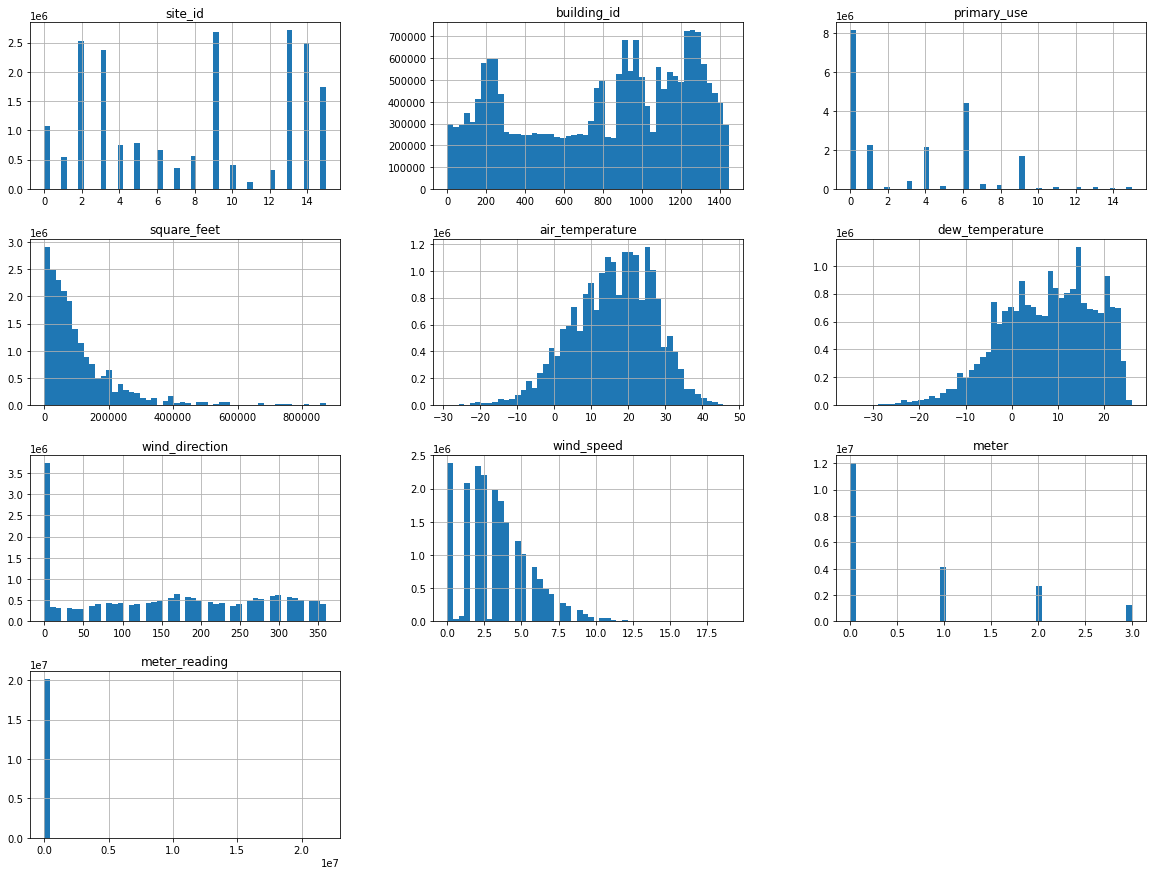

In [ ]:
gabungan2.hist(bins=50, figsize=(20,15))

Id lokasi dan id gedung memiliki luas bangunan mencapai 800.000. sebagian besar gedung digunakan untuk untuk edukasi/pendidikan. suhu udara dan suhu titik embun stabil. ketika suhu udara naik maka suhu titik embun naik dan ketika suhu udara turun maka suhu titik embun turun. kondisi arah dan kecepatan angin memiliki korelasi yg tinggi. penggunaan energi didominasi oleh gedung yang diperuntukan edukasi

In [ ]:
# Total energi yang digunakan pada sgedung-gedung
gabungan2['meter_reading'].sum()

42763149942.57978

In [ ]:
gabungan2.corr()

,site_id,building_id,primary_use,square_feet,air_temperature,dew_temperature,wind_direction,wind_speed,meter,meter_reading
site_id,1.000000,0.980872,0.077539,0.092335,-0.307168,-0.135166,0.041577,0.011638,0.254355,0.011996
building_id,0.980872,1.000000,0.058739,0.088990,-0.314120,-0.110076,0.034597,0.003780,0.222599,0.008848
primary_use,0.077539,0.058739,1.000000,-0.086189,-0.043453,-0.013642,0.038873,0.052306,-0.081780,-0.009962
square_feet,0.092335,0.088990,-0.086189,1.000000,-0.015661,-0.023379,-0.028407,-0.034815,0.132866,0.024347
air_temperature,-0.307168,-0.314120,-0.043453,-0.015661,1.000000,0.750572,-0.149442,-0.081508,-0.011156,-0.004132
dew_temperature,-0.135166,-0.110076,-0.013642,-0.023379,0.750572,1.000000,-0.200064,-0.141599,-0.080426,-0.003329
wind_direction,0.041577,0.034597,0.038873,-0.028407,-0.149442,-0.200064,1.000000,0.444966,-0.037397,0.000649
wind_speed,0.011638,0.003780,0.052306,-0.034815,-0.081508,-0.141599,0.444966,1.000000,-0.081001,0.006068
meter,0.254355,0.222599,-0.081780,0.132866,-0.011156,-0.080426,-0.037397,-0.081001,1.000000,0.017710
meter_reading,0.011996,0.008848,-0.009962,0.024347,-0.004132,-0.003329,0.000649,0.006068,0.017710,1.000000


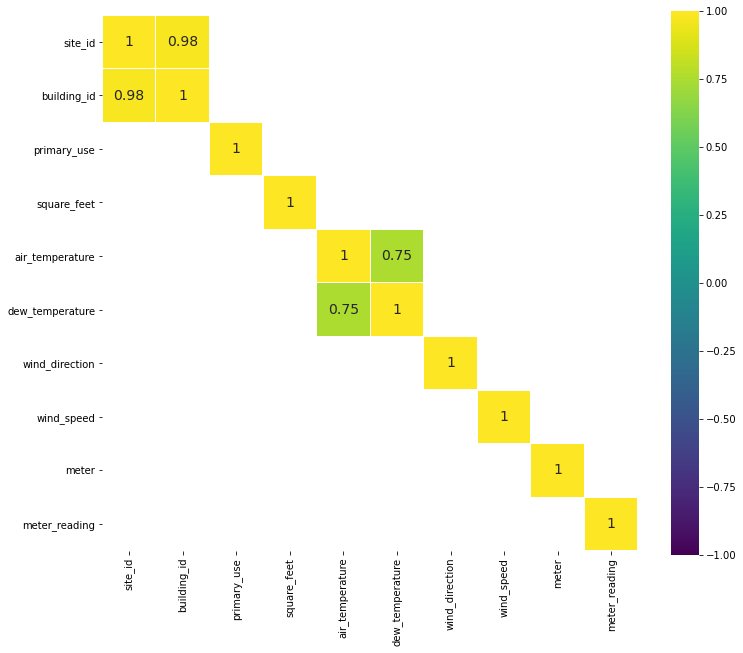

In [ ]:
corr2 = gabungan2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Plot diatas adalah analisis korelasi yang merupakan salah satu teknik statistik yang digunakan untuk mengukur korelasi antara dua variabel. Nilai Koefisien 0 atau mendekati 0 dianggap tidak berhubungan antara dua variabel yang diuji. Berdasarkan plot diatas, beberapa variabel memiliki nilai koefisien 1 hal tersebut menunjukkan bahwa korelasi antara dua variabel adalah korelasi  yang sempurna (korelasi positif). Variabel "suhu udara"  dan "suhu titik embun" masing-memiliki nilai koefisien 0,75. Nilai koefisien korelasi tersebut mendekati +1, berarti terjadi korelasi positif yang erat. Variabel "lokasi" dan "gedung" masing-memiliki nilai koefisien 0,98 dan nilai koefisien korelasi tersebut mendekati +1, berarti terjadi korelasi positif yang erat.